In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [105]:
cars= pd.read_csv('Car details.csv')

In [106]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [107]:
cars.drop('torque',axis=1, inplace= True)

In [108]:
#We are only interested in the cars which are manufacured year 2000 onwards
cars= cars[cars['year']>= 2000]    
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [109]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8079 non-null   object 
 1   year           8079 non-null   int64  
 2   selling_price  8079 non-null   int64  
 3   km_driven      8079 non-null   int64  
 4   fuel           8079 non-null   object 
 5   seller_type    8079 non-null   object 
 6   transmission   8079 non-null   object 
 7   owner          8079 non-null   object 
 8   mileage        7870 non-null   object 
 9   engine         7870 non-null   object 
 10  max_power      7876 non-null   object 
 11  seats          7870 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 820.5+ KB


In [110]:
#Checking missing values
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          209
engine           209
max_power        203
seats            209
dtype: int64

In [111]:
# checking % of null values
cars.isnull().sum()/cars.isnull().sum().sum()*100

name              0.000000
year              0.000000
selling_price     0.000000
km_driven         0.000000
fuel              0.000000
seller_type       0.000000
transmission      0.000000
owner             0.000000
mileage          25.180723
engine           25.180723
max_power        24.457831
seats            25.180723
dtype: float64

In [112]:
cars.describe(include= 'all' ).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,8079,2043,Maruti Swift Dzire VDI,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,8079.0,NaN,NaN,NaN,2013.904691,3.837995,2000.0,2011.5,2015.0,2017.0,2020.0
selling_price,8079.0,NaN,NaN,NaN,641627.213021,807525.548427,30000.0,260000.0,450000.0,678000.0,10000000.0
km_driven,8079.0,NaN,NaN,NaN,69732.05669,56619.669227,1.0,35000.0,60000.0,97000.0,2360457.0
fuel,8079,4,Diesel,4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,8079,3,Individual,6717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,8079,2,Manual,7030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,8079,5,First Owner,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,7870,393,18.9 kmpl,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,7870,121,1248 CC,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
#Checking duplicate values
cars.duplicated().sum()

1201

In [114]:

#Dropping duplicate vaues from teh dataset
cars.drop_duplicates(inplace= True)

In [115]:
cars.shape

(6878, 12)

In [116]:
#Checking null values post dropping missing values
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          196
engine           196
max_power        193
seats            196
dtype: int64

In [117]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [118]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6878 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6878 non-null   object 
 1   year           6878 non-null   int64  
 2   selling_price  6878 non-null   int64  
 3   km_driven      6878 non-null   int64  
 4   fuel           6878 non-null   object 
 5   seller_type    6878 non-null   object 
 6   transmission   6878 non-null   object 
 7   owner          6878 non-null   object 
 8   mileage        6682 non-null   object 
 9   engine         6682 non-null   object 
 10  max_power      6685 non-null   object 
 11  seats          6682 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 698.5+ KB


In [119]:
#Selecting object dtype variables
cars.select_dtypes(include= 'object').head()

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp


In [120]:
#Now, Mileage, Engine and Power needs to be cleaned and to be converted into float string
cars['mileage']= cars['mileage'].str.replace('kmpl','').str.replace('km/kg','').astype('float')
cars['engine']= cars['engine'].str.replace('CC','').astype('float')


cars['max_power']= cars['max_power'].replace(' bhp', np.nan)
cars['max_power']= cars['max_power'].str.replace('bhp','').astype('float')

In [121]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


## EDA

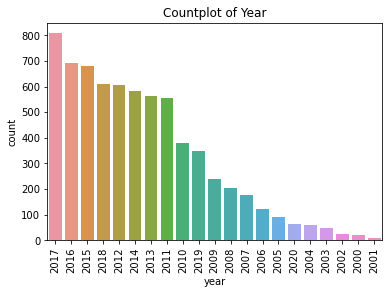

In [122]:
# Year

sns.countplot(cars.year,order= cars.year.value_counts().index)
plt.xticks(rotation=90)
plt.title('Countplot of Year');

#Maximum cars are manufactured in year 2017 followed by 2016 and 2015.
#Minimum cars are manufactured in Year 2001 

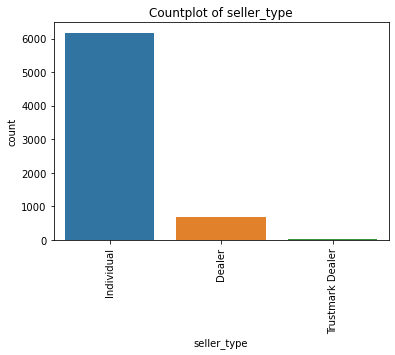

In [123]:
#seller_type
sns.countplot(cars.seller_type,order= cars.seller_type.value_counts().index)
plt.xticks(rotation=90)
plt.title('Countplot of seller_type');

#Maximum cars are owned by Individuals

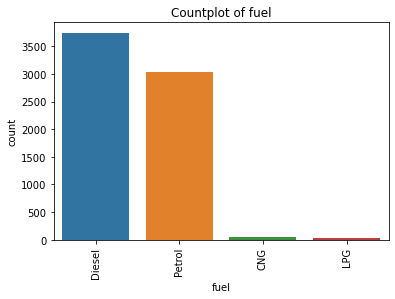

In [124]:
#Fuel
sns.countplot(cars.fuel,order= cars.fuel.value_counts().index)
plt.xticks(rotation=90)
plt.title('Countplot of fuel');

# Mostly cars are of Diesel and least are of LPG cars

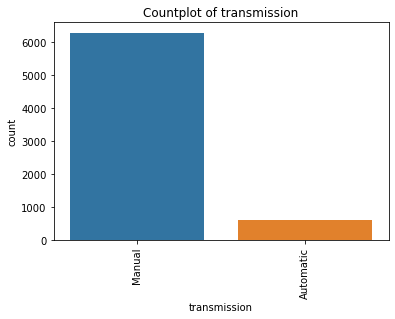

In [125]:
#transmission
sns.countplot(cars.transmission,order= cars.transmission.value_counts().index)
plt.xticks(rotation=90)
plt.title('Countplot of transmission');

#There are 2 types of transmission, maximum cars are of manual transmission.

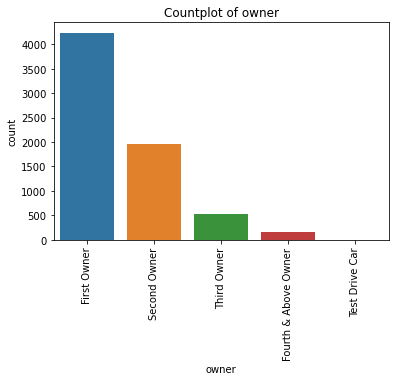

In [126]:
#owner
sns.countplot(cars.owner,order= cars.owner.value_counts().index)
plt.xticks(rotation=90)
plt.title('Countplot of owner');

#Mostly cars available for resale are from the First owner

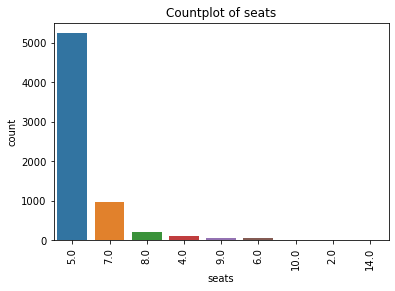

In [127]:
#seats
sns.countplot(cars.seats,order= cars.seats.value_counts().index)
plt.xticks(rotation=90)
plt.title('Countplot of seats');

#Mostly cars are 5 seater

<AxesSubplot:xlabel='engine', ylabel='Density'>

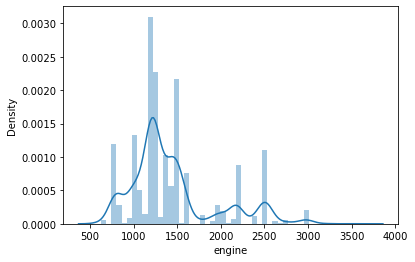

In [128]:
sns.distplot(cars.engine)

#Data is skewed on both ends but mostly outliers are on teh upper side of teh data.

<AxesSubplot:xlabel='mileage', ylabel='Density'>

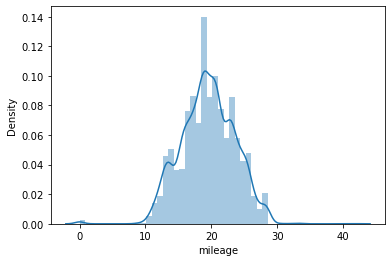

In [129]:
sns.distplot(cars.mileage)

#Outliers are on teh both sides of the data but same are having approximate nullifying impact of teh data leading to normal distribution indicated via mean= median too.

<AxesSubplot:xlabel='max_power', ylabel='Density'>

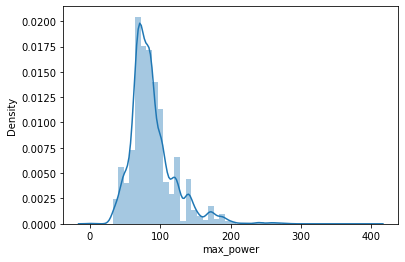

In [130]:
sns.distplot(cars.max_power)

#Right skewed data

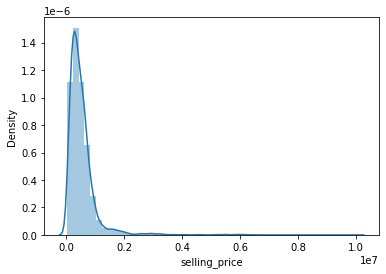

In [131]:
sns.distplot(cars.selling_price);

#Data is highly right skewed

In [132]:

cars.select_dtypes('object').head()

,name,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner


In [133]:
# Creating a new brand name 
cars['Brand']= cars['name'].apply(lambda x: x.split()[0])

In [134]:
cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,Hyundai
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0,Maruti
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0,Maruti
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0,Toyota
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0,Ford


In [135]:
cars['Brand'].value_counts()

Maruti           2131
Hyundai          1265
Mahindra          717
Tata              646
Honda             362
Ford              361
Toyota            357
Chevrolet         216
Renault           206
Volkswagen        174
Nissan             73
Skoda              70
Datsun             57
BMW                47
Mercedes-Benz      46
Fiat               44
Audi               33
Jeep               22
Mitsubishi          9
Volvo               9
Jaguar              8
Force               4
Isuzu               4
Land                3
MG                  3
Daewoo              3
Kia                 3
Ambassador          3
Lexus               1
Ashok               1
Name: Brand, dtype: int64

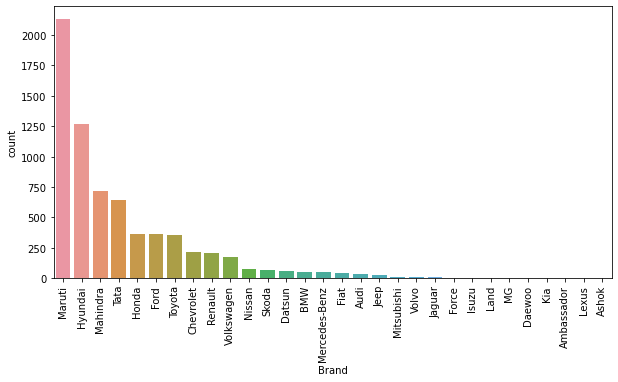

In [136]:
plt.figure(figsize=(10,5))
sns.countplot(cars['Brand'], order= cars['Brand'].value_counts().index)
plt.xticks(rotation=90);

#Maximum no. of cars are of Maruti Brand followed by Hyundai

In [137]:
# Creating a new Variable Model from Existing feature Name
cars['Model']= cars['name'].apply(lambda x: ' '.join (x.split()[1:]))

In [138]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,Model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,Swift VXI BSIII


In [139]:
pd.options.display.max_rows= 300
cars['Brand'].value_counts().sort_index(ascending= True)

Ambassador          3
Ashok               1
Audi               33
BMW                47
Chevrolet         216
Daewoo              3
Datsun             57
Fiat               44
Force               4
Ford              361
Honda             362
Hyundai          1265
Isuzu               4
Jaguar              8
Jeep               22
Kia                 3
Land                3
Lexus               1
MG                  3
Mahindra          717
Maruti           2131
Mercedes-Benz      46
Mitsubishi          9
Nissan             73
Renault           206
Skoda              70
Tata              646
Toyota            357
Volkswagen        174
Volvo               9
Name: Brand, dtype: int64

In [140]:
pd.options.display.max_rows= 300
cars['Model'].value_counts().sort_index(ascending= True)

3 Series 320d                       1
3 Series 320d Corporate Edition     1
3 Series 320d GT Luxury Line        1
3 Series 320d Highline              2
3 Series 320d Luxury Line           3
                                   ..
i20 Sportz 1.4 CRDi                16
i20 Sportz AT 1.4                   1
i20 Sportz Diesel                   1
i20 Sportz Option 1.2               3
i20 Sportz Option 1.4 CRDi          4
Name: Model, Length: 2043, dtype: int64

In [141]:
cars.year.value_counts().sort_index()

2000     20
2001      9
2002     26
2003     47
2004     60
2005     91
2006    123
2007    176
2008    205
2009    240
2010    380
2011    554
2012    604
2013    562
2014    581
2015    681
2016    693
2017    808
2018    608
2019    347
2020     63
Name: year, dtype: int64

In [142]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,Model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,Swift VXI BSIII


In [143]:
# Lets Bin teh cars into 3 categories based on the Price of the Brand

# Budget- Friendly
# Medium Range
# Top Notch Cars

In [144]:
round(cars.selling_price.describe(),)

count        6878.0
mean       520297.0
std        520285.0
min         30000.0
25%        250000.0
50%        409999.0
75%        640000.0
max      10000000.0
Name: selling_price, dtype: float64

In [145]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,Model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,Swift VXI BSIII


In [146]:

#Binning the cars based on teh Average price of each car company
cars2= cars.copy() # creating a new dataset , so not to hamper the original one.

In [147]:
cars2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,Model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,Swift VXI BSIII


In [148]:
price_by_brand= cars2.groupby(['Brand'])['selling_price'].median().sort_values(ascending= False)

In [149]:
price_by_brand


Brand
Lexus            5150000.0
Volvo            3400000.0
Jaguar           2668000.0
BMW              2150000.0
Audi             2000000.0
Land             2000000.0
Mercedes-Benz    1892000.0
MG               1750000.0
Jeep             1650000.0
Isuzu            1575000.0
Kia              1575000.0
Mitsubishi        950000.0
Force             880000.0
Toyota            700000.0
Mahindra          560000.0
Honda             560000.0
Ford              450000.0
Volkswagen        422500.0
Hyundai           415000.0
Skoda             397500.0
Renault           395000.0
Nissan            370000.0
Maruti            350000.0
Datsun            300000.0
Ashok             300000.0
Fiat              282500.0
Tata              253999.0
Chevrolet         220000.0
Ambassador        122000.0
Daewoo             86000.0
Name: selling_price, dtype: float64

In [150]:
cars2 = cars2.merge(price_by_brand, how= 'left', on= 'Brand')

In [151]:
cars2.head()

,name,year,selling_price_x,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,Model,selling_price_y
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,Swift Dzire VDI,350000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition,397500.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,City 2017-2020 EXi,560000.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,i20 Sportz Diesel,415000.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,Swift VXI BSIII,350000.0


In [152]:
cars2.to_csv('cars2.csv')

In [153]:
# creating bins as per price and adding teh same in dataset
bins= [0,1000000,2000000,10000000]
label = ['Budget_friendly', 'Medium_range','Top_notch_cars']
cars['car_category'] = pd.cut(cars['selling_price'],bins, right= True,labels= label)
cars.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,Model,car_category
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,Swift Dzire VDI,Budget_friendly
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition,Budget_friendly
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,City 2017-2020 EXi,Budget_friendly
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,i20 Sportz Diesel,Budget_friendly
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,Swift VXI BSIII,Budget_friendly


In [154]:
cars['car_category'].value_counts()

Budget_friendly    6402
Medium_range        367
Top_notch_cars      109
Name: car_category, dtype: int64

In [155]:
cars.to_csv('cars_mdv.csv')

In [156]:
cars.groupby('Brand')['car_category'].value_counts()

Brand                         
Ambassador     Budget_friendly       3
               Medium_range          0
               Top_notch_cars        0
Ashok          Budget_friendly       1
               Medium_range          0
               Top_notch_cars        0
Audi           Top_notch_cars       16
               Medium_range         15
               Budget_friendly       2
BMW            Top_notch_cars       25
               Medium_range         12
               Budget_friendly      10
Chevrolet      Budget_friendly     215
               Medium_range          1
               Top_notch_cars        0
Daewoo         Budget_friendly       3
               Medium_range          0
               Top_notch_cars        0
Datsun         Budget_friendly      57
               Medium_range          0
               Top_notch_cars        0
Fiat           Budget_friendly      44
               Medium_range          0
               Top_notch_cars        0
Force          Budget_friendly   

In [157]:
# Creating a new Column car age

import datetime
now= datetime.datetime.now()
now.year
cars['CarAge']= 2020-cars.year

In [158]:
cars['CarAge'].value_counts(ascending= False)

3     808
4     693
5     681
2     608
8     604
6     581
7     562
9     554
10    380
1     347
11    240
12    205
13    176
14    123
15     91
0      63
16     60
17     47
18     26
20     20
19      9
Name: CarAge, dtype: int64

In [159]:
cars.shape

(6878, 16)

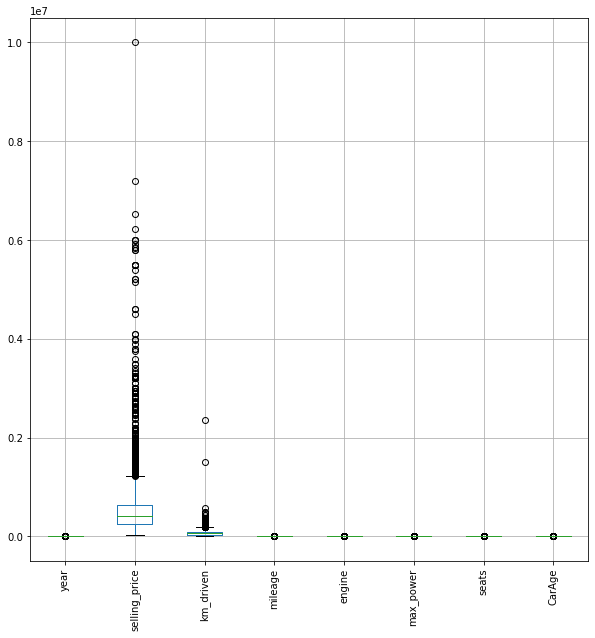

In [160]:
plt.figure(figsize= (10,10))
cars.boxplot()
plt.xticks(rotation=90);

In [161]:
cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'Brand', 'Model', 'car_category', 'CarAge'],
      dtype='object')

In [162]:
data_plot= cars[['km_driven','mileage','engine','max_power','CarAge']] #Seats and No. of doors are not considered as discrete values

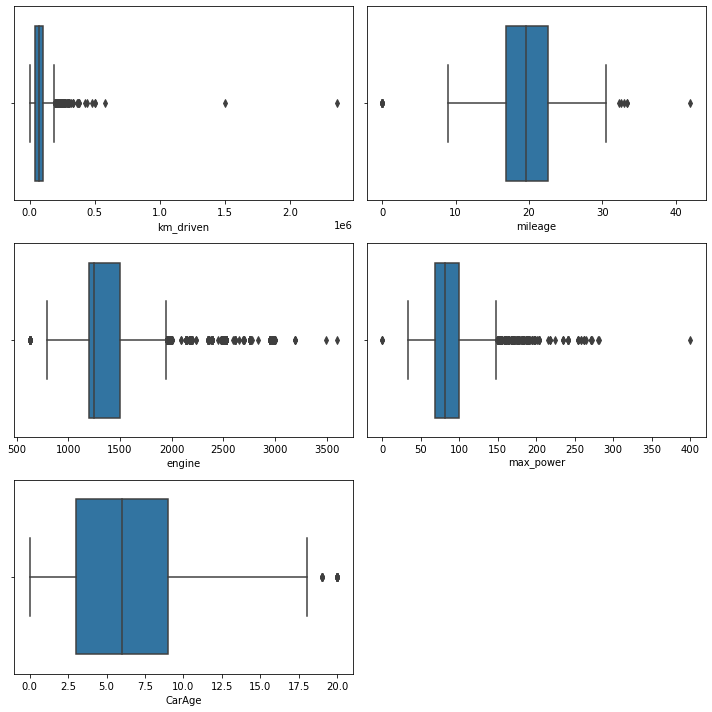

In [163]:
fig= plt.figure(figsize=(10,10))
for i in range(0,len(data_plot.columns)):
    ax= fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout();

In [164]:
# Treating outlierss

Q1= cars.quantile(0.25)
Q3= cars.quantile(0.75)

IQR= Q3- Q1

lower_range= Q1- (1.5*IQR)
upper_range= Q3+ (1.5*IQR)

In [165]:
lower_range

year               2002.000
selling_price   -335000.000
km_driven        -52253.125
mileage               8.190
engine              745.500
max_power            20.000
seats                 5.000
CarAge               -6.000
dtype: float64

In [166]:
upper_range

year                2026.000
selling_price    1225000.000
km_driven         191351.875
mileage               31.150
engine              1949.500
max_power            148.000
seats                  5.000
CarAge                18.000
dtype: float64

In [167]:
cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'Brand', 'Model', 'car_category', 'CarAge'],
      dtype='object')

In [168]:
cars['km_driven'] = np.where(cars['km_driven']> upper_range['km_driven'], upper_range['km_driven'], cars['km_driven'])

cars['mileage'] = np.where(cars['mileage']> upper_range['mileage'], upper_range['mileage'], cars['mileage'])
cars['mileage'] = np.where(cars['mileage']< lower_range['mileage'], lower_range['mileage'], cars['mileage'])

cars['engine'] = np.where(cars['engine']> upper_range['engine'], upper_range['engine'], cars['engine'])
cars['engine'] = np.where(cars['engine']< lower_range['engine'], upper_range['engine'], cars['engine'])

cars['max_power'] = np.where(cars['max_power']> upper_range['max_power'], upper_range['max_power'], cars['max_power'])
cars['max_power'] = np.where(cars['max_power']< lower_range['max_power'], upper_range['max_power'], cars['max_power'])

cars['CarAge'] = np.where(cars['CarAge']> upper_range['CarAge'], upper_range['CarAge'], cars['CarAge'])

In [169]:
cars['engine'].describe()

count    6682.000000
mean     1365.438192
std       344.244708
min       793.000000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      1949.500000
Name: engine, dtype: float64

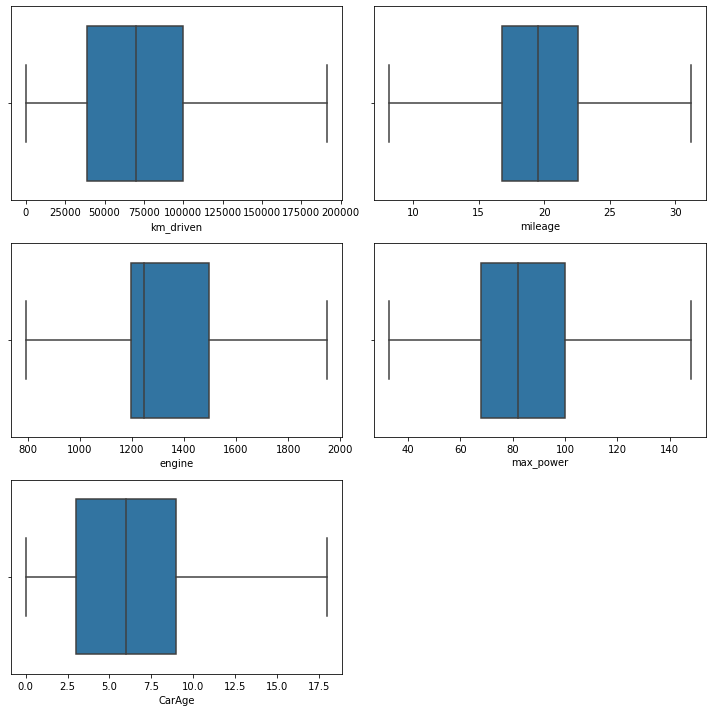

In [170]:
data_plot= cars[['km_driven','mileage','engine','max_power','CarAge']] 
fig= plt.figure(figsize=(10,10))
for i in range(0,len(data_plot.columns)):
    ax= fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

In [171]:
## Null Value Imputation
cols= cars.isnull().sum()[cars.isnull().sum()>0].index
cols.dtype

dtype('O')

In [172]:
# Separating object from numerical column

non_objects= cars[cols].select_dtypes(exclude = ['object','category']).columns

In [173]:
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(missing_values=np.nan,strategy='median',verbose= 0)
cars[non_objects]= imputer.fit_transform(cars[non_objects])

In [174]:
cars[non_objects].isnull().sum()

mileage      0
engine       0
max_power    0
seats        0
dtype: int64

In [175]:
cars.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
Brand            0
Model            0
car_category     0
CarAge           0
dtype: int64

In [176]:
cars.drop(['name','year'],axis=1,inplace= True)

In [177]:
cars.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,Model,car_category,CarAge
0,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,Swift Dzire VDI,Budget_friendly,6.0
1,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition,Budget_friendly,6.0
2,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,City 2017-2020 EXi,Budget_friendly,14.0
3,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,i20 Sportz Diesel,Budget_friendly,10.0
4,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,Swift VXI BSIII,Budget_friendly,13.0


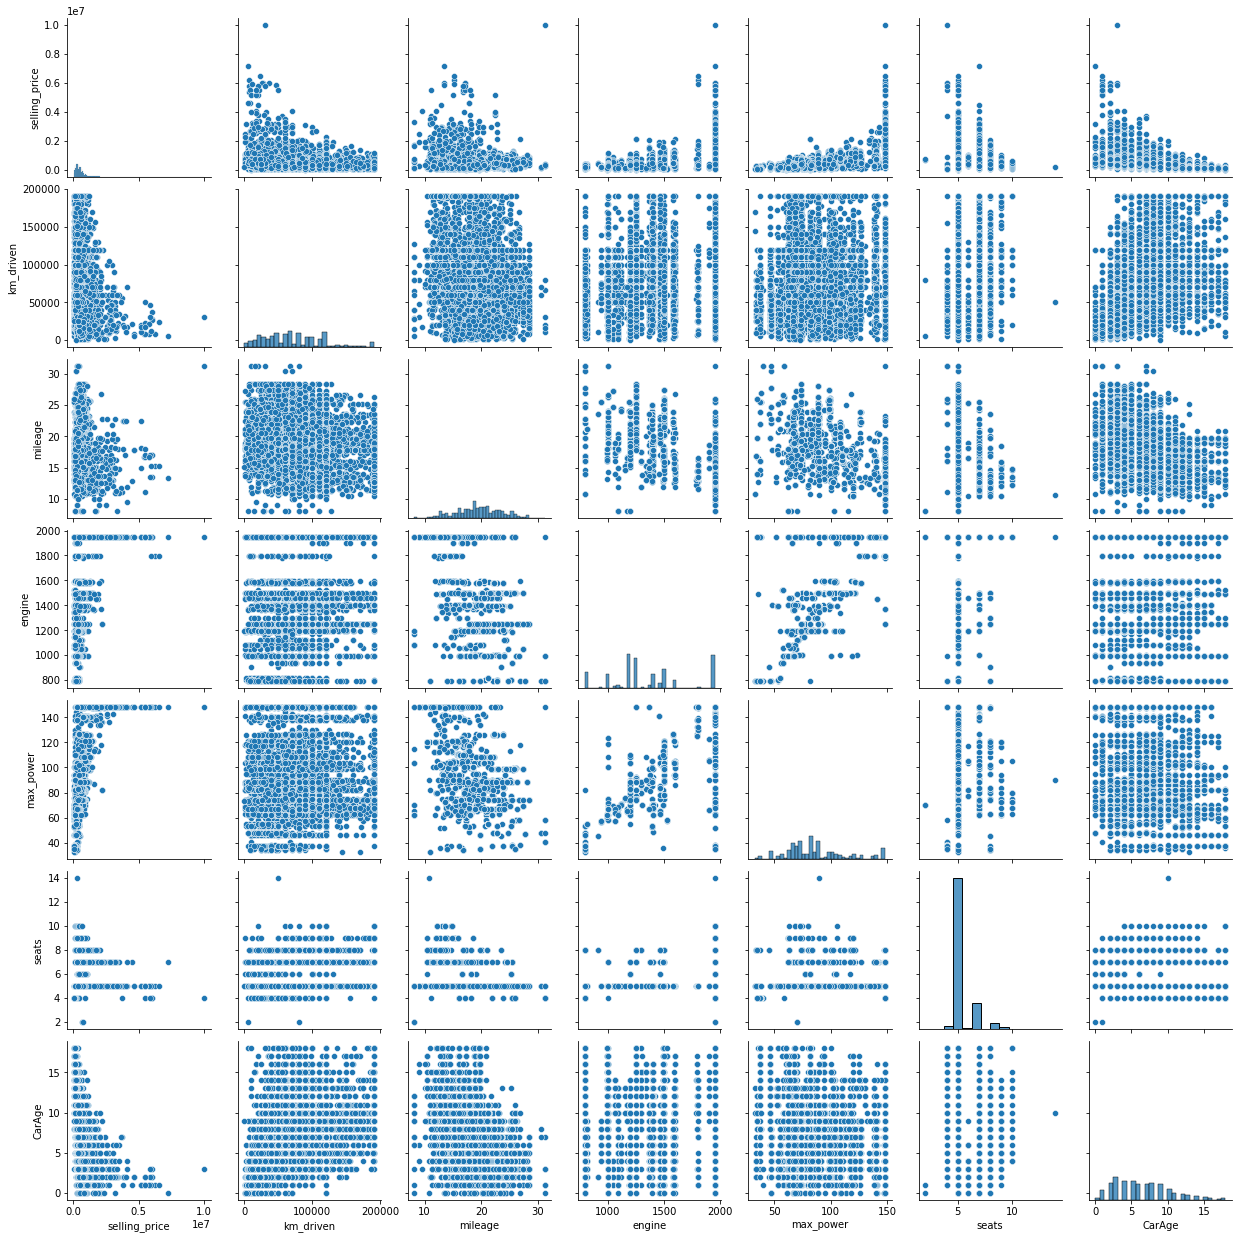

In [178]:
## Pairplot
sns.pairplot(cars)

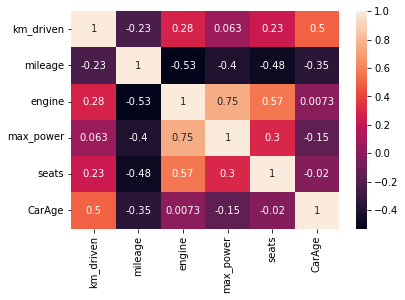

In [179]:
corr_data= cars.drop('selling_price',axis=1)
sns.heatmap(corr_data.corr(),annot= True);

In [180]:
cars.select_dtypes(include= 'object').head()

,fuel,seller_type,transmission,owner,Brand,Model
0,Diesel,Individual,Manual,First Owner,Maruti,Swift Dzire VDI
1,Diesel,Individual,Manual,Second Owner,Skoda,Rapid 1.5 TDI Ambition
2,Petrol,Individual,Manual,Third Owner,Honda,City 2017-2020 EXi
3,Diesel,Individual,Manual,First Owner,Hyundai,i20 Sportz Diesel
4,Petrol,Individual,Manual,First Owner,Maruti,Swift VXI BSIII


In [181]:
cars.owner.value_counts()

First Owner             4236
Second Owner            1953
Third Owner              522
Fourth & Above Owner     162
Test Drive Car             5
Name: owner, dtype: int64

In [182]:
cars.owner = cars.owner.replace({'First Owner':3,'Second Owner':2,'Third Owner':1,'Fourth & Above Owner':0,'Test Drive Car':-1})

In [183]:
cars.owner.value_counts()

 3    4236
 2    1953
 1     522
 0     162
-1       5
Name: owner, dtype: int64

In [184]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6878 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   selling_price  6878 non-null   int64   
 1   km_driven      6878 non-null   float64 
 2   fuel           6878 non-null   object  
 3   seller_type    6878 non-null   object  
 4   transmission   6878 non-null   object  
 5   owner          6878 non-null   int64   
 6   mileage        6878 non-null   float64 
 7   engine         6878 non-null   float64 
 8   max_power      6878 non-null   float64 
 9   seats          6878 non-null   float64 
 10  Brand          6878 non-null   object  
 11  Model          6878 non-null   object  
 12  car_category   6878 non-null   category
 13  CarAge         6878 non-null   float64 
dtypes: category(1), float64(6), int64(2), object(5)
memory usage: 1017.2+ KB


In [185]:
for feature in cars.columns:
    if cars[feature].dtype == 'object':
        cars[feature]= pd.Categorical(cars[feature]).codes
        
cars.car_category = pd.Categorical(cars.car_category).codes

In [186]:
cars.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,Model,car_category,CarAge
0,450000,145500.0,1,1,1,3,23.40,1248.0,74.00,5.0,20,1551,0,6.0
1,370000,120000.0,1,1,1,2,21.14,1498.0,103.52,5.0,25,1263,0,6.0
2,158000,140000.0,3,1,1,1,17.70,1497.0,78.00,5.0,10,328,0,14.0
3,225000,127000.0,1,1,1,3,23.00,1396.0,90.00,5.0,11,2040,0,10.0
4,130000,120000.0,3,1,1,3,16.10,1298.0,88.20,5.0,20,1593,0,13.0


In [187]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6878 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6878 non-null   int64  
 1   km_driven      6878 non-null   float64
 2   fuel           6878 non-null   int8   
 3   seller_type    6878 non-null   int8   
 4   transmission   6878 non-null   int8   
 5   owner          6878 non-null   int64  
 6   mileage        6878 non-null   float64
 7   engine         6878 non-null   float64
 8   max_power      6878 non-null   float64
 9   seats          6878 non-null   float64
 10  Brand          6878 non-null   int8   
 11  Model          6878 non-null   int16  
 12  car_category   6878 non-null   int8   
 13  CarAge         6878 non-null   float64
dtypes: float64(6), int16(1), int64(2), int8(5)
memory usage: 788.7 KB


In [188]:
## Model Building

X= cars.drop('selling_price',axis=1)
Y= cars.pop('selling_price')

X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.3, random_state=1)

# Random Forest Regressor

In [97]:
regression = RandomForestRegressor()
regression= regression.fit(X_train,Y_train)

In [98]:
#Accuracy Score
print(regression.score(X_train,Y_train))
print(regression.score(X_test,Y_test)) # Low overfitting, better than decision tree

0.9870800036628674
0.9209920509700291


In [99]:
print(r2_score(Y_train,regression.predict(X_train)))
print(r2_score(Y_test,regression.predict(X_test)))

0.9870800036628674
0.9209920509700291


In [100]:
#Mean squared error
print(np.sqrt(mean_squared_error(Y_train,regression.predict(X_train))))
print(np.sqrt(mean_squared_error(Y_test,regression.predict(X_test))))

61244.59878612196
133248.95882317863


In [101]:
print(np.sqrt(mean_absolute_error(Y_train,regression.predict(X_train))))
print(np.sqrt(mean_absolute_error(Y_test,regression.predict(X_test))))

165.04269036776964
265.19737409873943


In [102]:
pd.DataFrame(regression.feature_importances_, columns= ['Imp'], index= X_train.columns).sort_values(by='Imp',ascending = False)

,Imp
car_category,0.691080
CarAge,0.109520
max_power,0.060001
mileage,0.036766
Brand,0.024336
seats,0.020833
Model,0.020583
km_driven,0.015965
engine,0.009322
owner,0.004251


In [ ]:
# Even though Car-Category is derived feature but is very important that whether the car is Budget friendly, medium ranged or top notch
#Followed by Car age of the car i.e., manufactured year from the year of the dataset i.e., 2020
#Engine, Owner, fuel, seller_type contributes very minimum in predicting price of the used car
# Transmission does not contribute in predicting the price of the used car.